## LIST 3 Unstructured Data Twitter Assignment Michał Kuc and Piotr Paduszyński SET 2


In [7]:
#### Required libraries
import tweepy as tw
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

First of all we have to scrap tweets. We decided to scrap data from @tvn24 and @tvp_info accounts.

As in SET 1 we have to connect with twitter by our develpor account using personal keys and tokens.

Then we have to use tweepy.Cursor to scrap tweets which we are intersted in.

In [6]:
### Active developer twiiter acount
consumer_key= 'We'
consumer_secret= 'should not'
access_token= 'share'
access_token_secret= 'our keys'


auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Data downloading

Below we present a function which search and transform tweets from specific account into the csv file.

In [4]:
def tweets_to_excel(user,since,until,file):
    list_tweets = []
    
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended',include_rts = False).items():
        if until > tweet.created_at > since: 
            list_tweets.append(tweet)
        elif tweet.created_at < since: 
            break
            
    outtweets = [[tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.user.name,
              tweet.full_text.encode("utf-8").decode("utf-8").replace("\n","")] 
                for tweet in list_tweets]
    
    df = pd.DataFrame(outtweets,columns=["created_at","likes","retweets","user", "text"])
    df.to_csv(file+".csv")

In [5]:
### Scrap tweets
user = "@tvn24"
user2 = "@tvp_info"
until = datetime.datetime(2020,11,5)
since = dateime.datetime(2020,10,29)
file = "tvn"
file2 = "tvp"
tweets_to_excel(user,since,until,file) #tvn
tweets_to_excel(user2,since,until,file2) #tvp

In [91]:
### Load csv file
TVN = pd.read_csv('tvn.csv')
TVP = pd.read_csv('tvp.csv')

## Cleaning data

First of all we create another columns which contains date and time separatly.
Additionally we rename 'user' column for @tvp_info data. 

In [92]:
### Add time and date separatlly 
dates = []
times = []

for i in TVN['created_at']:
    data = datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
    data2 = datetime.datetime.date(data)
    time2 = datetime.datetime.time(data)
    dates.append(data2)
    times.append(time2)
    
TVN.insert(2, "date", dates, True)
TVN.insert(3, "time", times, True)
del TVN['Unnamed: 0']

dates = []
times = []

for i in TVP['created_at']:
    data = datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
    data2 = datetime.datetime.date(data)
    time2 = datetime.datetime.time(data)
    dates.append(data2)
    times.append(time2)
    
TVP.insert(2, "date", dates, True)
TVP.insert(3, "time", times, True)
del TVP['Unnamed: 0']
TVP["user"].replace({"portal tvp.info 🇵🇱": "tvp.info"}, inplace=True)

In [8]:
TVP.head(10)

created_at        date      time  likes  retweets      user  \
0  2020-11-04 23:06:55  2020-11-04  23:06:55     19         6  tvp.info   
1  2020-11-04 22:06:04  2020-11-04  22:06:04     84        19  tvp.info   
2  2020-11-04 21:30:20  2020-11-04  21:30:20      8         1  tvp.info   
3  2020-11-04 21:25:08  2020-11-04  21:25:08     12         4  tvp.info   
4  2020-11-04 21:19:57  2020-11-04  21:19:57      3         1  tvp.info   
5  2020-11-04 21:13:30  2020-11-04  21:13:30      8         3  tvp.info   
6  2020-11-04 20:35:46  2020-11-04  20:35:46     13         1  tvp.info   
7  2020-11-04 20:33:56  2020-11-04  20:33:56     14         3  tvp.info   
8  2020-11-04 20:30:58  2020-11-04  20:30:58    126        22  tvp.info   
9  2020-11-04 20:21:13  2020-11-04  20:21:13    247        84  tvp.info   

                                                text  
0  Kandydat Demokratów Joe #Biden może liczyć na ...  
1  Pojawia się coraz więcej pytań o możliwe konfl...  
2  Teatr Lalka udostępnił online cykl „Legendy wa...  
3  Wybory prezydenckie w USA: Biden czy Trump? [R...  
4  @alarm_tvp1: Niepełnosprawni dotknięci żądania...  
5  Nie żyje autor kultowych fotografii w „Roling ...  
6  Białoruś. Wyrok łagru za rzucenie butelką w mi...  
7  Co z Marszem Niepodległości i Nowym Rokiem? Pr...  
8  Arizona jednak dla Trumpa? Mogło dojść do błęd...  
9  #Election2020 @TomaszSakiewicz w #Minęła20: Wy...

In [9]:
TVN.head(10)

created_at        date      time  likes  retweets   user  \
0  2020-11-04 22:15:52  2020-11-04  22:15:52     30         3  tvn24   
1  2020-11-04 21:21:40  2020-11-04  21:21:40      4         0  tvn24   
2  2020-11-04 21:20:01  2020-11-04  21:20:01     29         2  tvn24   
3  2020-11-04 21:05:51  2020-11-04  21:05:51     14         2  tvn24   
4  2020-11-04 20:55:53  2020-11-04  20:55:53     55         3  tvn24   
5  2020-11-04 20:28:13  2020-11-04  20:28:13     50         2  tvn24   
6  2020-11-04 20:16:38  2020-11-04  20:16:38     12         1  tvn24   
7  2020-11-04 20:06:04  2020-11-04  20:06:04    312        24  tvn24   
8  2020-11-04 19:59:15  2020-11-04  19:59:15     53         1  tvn24   
9  2020-11-04 19:37:48  2020-11-04  19:37:48      9         4  tvn24   

                                                text  
0  Trwa liczenie głosów po wyborach prezydenckich...  
1  #AmerykaWybiera #CzasDecyzji https://t.co/M5B2...  
2  Śledź przebieg amerykańskich wyborów z @tvn24 ...  
3  Posłowie brytyjskiej Izby Gmin poparli w środę...  
4  Mateusz Morawiecki powiedział też, że w tym ro...  
5  Gościem @KropkaNadI w @tvn24był Aleksander Kwa...  
6  #MilionerzyTVN | Pan Mikołaj Kramek z Warszawy...  
7  Stany Zjednoczone mówią jasno: szanujemy prawa...  
8  Myślę, że jesteśmy silniejsi teraz niż kiedyko...  
9  W tej chwili nie widzę takiej bezpośredniej ni...

As we can see above we have two dataframes which contains tweets since 29-10-2020 to 05.11.2020.

Every dataframe has columns about date of cration tweets, number of likes and retweets, users and text.

Summary we have 1414 tweets.

Merging two datagframes.

In [93]:
frames = [TVP, TVN]
result = pd.concat(frames,ignore_index = True)

## Analysis

We start our analysis with comapring number of retweets and likes group by date.

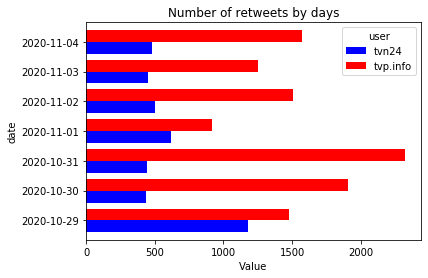

In [99]:
#### Retweets
table = result.groupby(['user','date'])['retweets'].sum().reset_index()

table = table.pivot('date','user','retweets')
table.plot.barh(width=0.8,color = ['blue','red'])
plt.title('Number of retweets by days')
plt.xlabel('Value')
plt.show()

In [98]:
#### Likes
table = result.groupby(['user','date'])['likes'].sum().reset_index()

table = table.pivot('date','user','likes')
table.plot(kind='area',color = ['blue','red'])
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.title('Number of likes by days')
plt.ylabel('Value')
plt.show()

As we can see above @tvp_info account has much more likes and retweets than @tvn24.

Of course, @tvp_info has more tweets than @tvn24, but it is not that much of difference to say that they have comparable number of retweets or likes.

Below we present partition by tweets generally, by days and by hours.

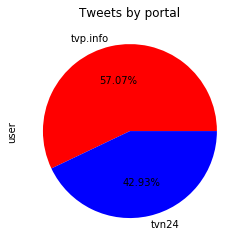

In [187]:
####Tweets
result.user.value_counts().plot(kind='pie',autopct='%1.2f%%',colors = ['red','blue'])
plt.title('Tweets by portal')
plt.show()


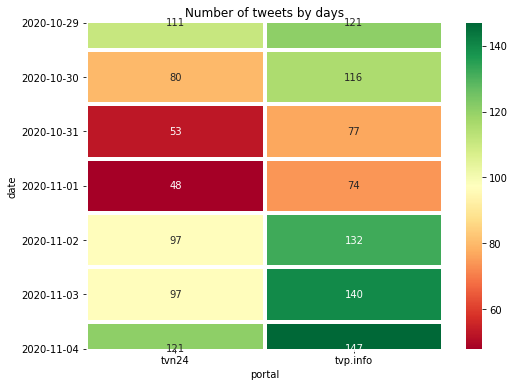

In [120]:
### Tweets by days
table = result.groupby(['user','date'])['text'].count().reset_index()

table = table.pivot('date','user','text')

sns.heatmap(table,cmap='RdYlGn',annot=True,fmt='1.0f',lw = 3)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.title('Number of tweets by days')
plt.xlabel('portal')
plt.show()

As we can see above @tvp_info account posted more tweets every single day.

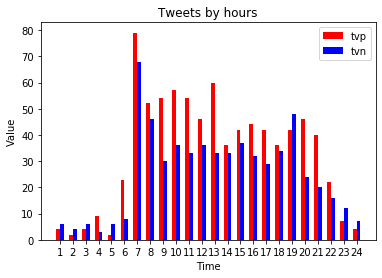

In [185]:
### Tweets by hours
tvp = []
tvn = []
for i in range(1,24):
    down_time = datetime.time(i-1,0,0)
    up_time = datetime.time(i,0,0)
    table = result[(down_time < result['time']) & (result['time'] <= up_time)]
    table = table.groupby(['user'])['user'].count()
    tvn.append([i,table[0]])
    tvp.append([i,table[1]])

table = result[(result['time'] > datetime.time(23,0,0))]
table = table.groupby(['user'])['user'].count()
tvn.append([24,table[0]])
tvp.append([24,table[1]])


x1,y1 = zip(*tvp)
x2,y2 = zip(*tvn)
plt.bar(np.array(x1)-0.15, y1, width = 0.3, color = 'red')
plt.bar(np.array(x2)+0.15, y2, width = 0.3, color = 'blue')
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
plt.title('Tweets by hours')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['tvp','tvn'])
plt.show()

The biggest number of tweets was posted between 6 a.m. and 7 a.m. Probably it looks like is that in Poland starts to work at 6 a.m. Then they can post a lot of tweets about news from night or informations about the current day.

## Word analysis

In [94]:
### Create list of polish stopwords
stopwords = pd.read_csv('stopwords.txt')
stopwords.columns = ['word']

List_of_stopwords = []

for i in stopwords['word']:
    List_of_stopwords.append(i)


In [95]:

def remove_url(txt): 
    return " ".join(re.sub(r'http\S+', '', txt).split())

for i in range(len(result)):
    text = result['text'][i]
    text = remove_url(text)
    
    result.loc[i, 'text'] = text
    

In [96]:
### Removing stopwords and cleaning tweets
from nltk import RegexpTokenizer
Tokenizer = RegexpTokenizer(r"[AaĄąBbCcĆćDdEeĘęFfGgHhIiJjKkLlŁłMmNnŃńOoÓóPpRrSsŚśTtUuWwVvXxYyZzŹźŻż]+")

Words_TVP = []
Words_TVN = []

for i in range(len(result)):
    text = result['text'][i]
    text = text.lower()
    text = Tokenizer.tokenize(text)
    cleantext = []
    for j in text:
        if j not in List_of_stopwords:
            cleantext.append(j)

    if result['user'][i] == 'tvp.info':
        for j in cleantext:
            Words_TVP.append(j)
    else:
        for j in cleantext:
            Words_TVN.append(j)


In [97]:
#### Counting number of words
TVP_dict = {}
TVN_dict = {}

for element in Words_TVP:
    if element in TVP_dict:
        TVP_dict[element] = TVP_dict[element] + 1
    else:
        TVP_dict[element] = 1
        
for element in Words_TVN:
    if element in TVN_dict:
        TVN_dict[element] = TVN_dict[element] + 1
    else:
        TVN_dict[element] = 1

In [99]:
#### Plot histograms

def get_key(val,dictionary): 
    for key, value in dictionary.items(): 
         if val == value: 
            return key 
 

### TVP 
f1 = [values for keys,values in TVP_dict.items()]
f1.sort()

name1 = []
values1 = [] 

for i in range(1,10):
    values1.append(f1[-i])
    name1.append(get_key(f1[-i],TVP_dict))
    
fig = plt.figure(figsize=(15,3))
plt.bar(name1,values1)
plt.title('Most popular words in tvp_info')
plt.xlabel('Name of word')
plt.ylabel('Value')
plt.show()  

### TVN
f2 = [values for keys,values in TVN_dict.items()]
f2.sort()

name2 = []
values2 = [] 

for i in range(1,10):
    values2.append(f2[-i])
    name2.append(get_key(f2[-i],TVN_dict))
    
fig = plt.figure(figsize=(15,3))
plt.bar(name2,values2)
plt.title('Most popular words in tvn24')
plt.xlabel('Name of word')
plt.ylabel('Value')
plt.show() 